In [248]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [441]:
data = pd.read_table('../../../Experiment Report 2017_12_1.tsv')

In [443]:
data.assay.value_counts()

ChIP-seq                                                10528
RNA-seq                                                  1821
DNase-seq                                                 999
eCLIP                                                     808
shRNA knockdown followed by RNA-seq                       727
RNA Bind-n-Seq                                            431
transcription profiling by array assay                    297
whole-genome shotgun bisulfite sequencing                 271
DNA methylation profiling by array assay                  260
RRBS                                                      227
siRNA knockdown followed by RNA-seq                       217
microRNA-seq                                              191
ATAC-seq                                                  179
RAMPAGE                                                   173
CRISPRi followed by RNA-seq                               147
comparative genomic hybridization by array                142
CAGE    

In [444]:
top_three = data.assay.value_counts().keys()[:3]

In [445]:
data.date = data.date.apply(lambda x: pd.to_datetime(x))

In [446]:
data.dtypes

assay            object
date     datetime64[ns]
uuid             object
dtype: object

In [447]:
d = sns.color_palette().as_hex()
d

['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

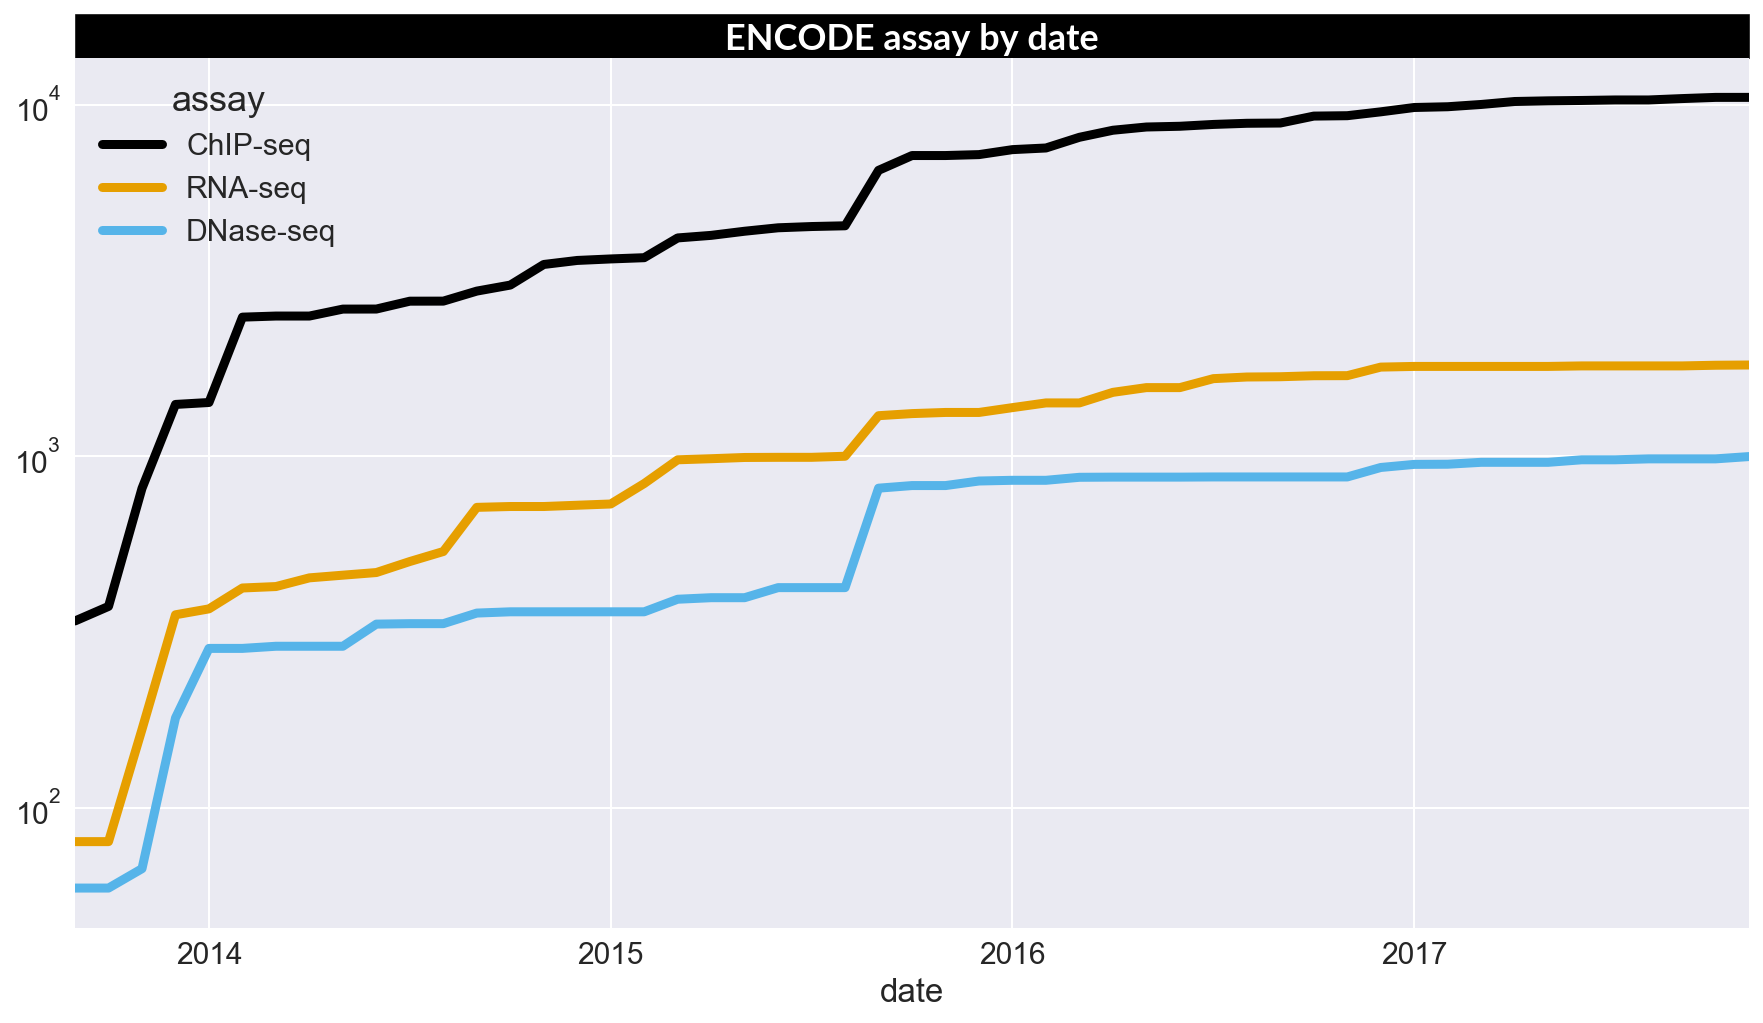

In [449]:
sns.set(style='darkgrid', font='Arial')
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(15, 8))
    (
        data.groupby(['assay', 'date'])
            .count()
            .unstack('assay')['uuid'][top_three]
            .resample('M').sum()
            .cumsum()
            .fillna(method='ffill')
            .plot(color=["#000000", "#E69F00",
                         "#56B4E9", "#009E73", 
                         "#F0E442", "#0072B2", 
                         "#D55E00", "#CC79A7"], lw=4.5, ax=ax, logy=True)
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.05,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.002,
        'ENCODE assay by date',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Lato',
        weight='bold'
    )